In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import random

# Charger les données du dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()



In [2]:
# Afficher des informations sur le dataset
print("Taille du dataset d'entraînement :", x_train.shape)
print("Taille du dataset de test :", x_test.shape)
print("Nombre d'images d'entraînement :", len(x_train))
print("Nombre d'images de test :", len(x_test))
num_classes = len(set(y_train.flatten()))
print("Nombre de classes :", num_classes)

Taille du dataset d'entraînement : (50000, 32, 32, 3)
Taille du dataset de test : (10000, 32, 32, 3)
Nombre d'images d'entraînement : 50000
Nombre d'images de test : 10000
Nombre de classes : 10


In [3]:
# Normaliser les images et effectuer le one-hot encoding des étiquettes
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [4]:
# Créer et compiler le modèle séquentiel
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

model.save('model.keras')



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1578506 (6.02 MB)
Trainable params: 1578506 (6.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1563/1563 [==============================] - 4s 2ms/step - loss: 7.4717 - accuracy: 0.1778 - val_loss: 7.4347 - val_accuracy: 0.1955
Epoch 2/20
1563/1563 [==============================] - 4s 2ms/step - loss: 7.4501 - accuracy: 0.1787 - val_loss: 7.4816 - val_accuracy: 0

### Créer et compiler le modèle CNN


In [5]:

# version clean of cnn with batch norm and dropout
# first convolution layer (batch norm ==> conv 3x3 ==> max pool 2x2)
model_cnn = models.Sequential()
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(layers.Dropout(0.05))
model_cnn.add(layers.MaxPooling2D((2, 2)))

model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(layers.Dropout(0.05))
model_cnn.add(layers.MaxPooling2D((2, 2)))

model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dropout(0.5))
model_cnn.add(layers.Dense(64, activation='relu'))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.Dropout(0.1))
model_cnn.add(layers.Dense(10, activation='softmax'))

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Entraîner le modèle CNN en utilisant ModelCheckpoint pour sauvegarder le meilleur modèle


In [6]:
checkpoint = ModelCheckpoint("best_model_epoch.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model_cnn.fit(x_train, y_train, batch_size=16, epochs=13, validation_data=(x_test, y_test), callbacks=callbacks_list)

# Sauvegarder les modèles
model_cnn.save('model_cnn.keras')

Epoch 1/13
3121/3125 [============================>.] - ETA: 0s - loss: 1.4465 - accuracy: 0.4886
Epoch 1: val_accuracy improved from -inf to 0.63240, saving model to best_model_epoch.hdf5
3125/3125 [==============================] - 22s 7ms/step - loss: 1.4463 - accuracy: 0.4888 - val_loss: 1.0552 - val_accuracy: 0.6324
Epoch 2/13
  13/3125 [..............................] - ETA: 27s - loss: 1.1195 - accuracy: 0.6154

/Users/yuss/Documents/cours_m2/machineLearning/tp4/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3124/3125 [============================>.] - ETA: 0s - loss: 1.1450 - accuracy: 0.5974
Epoch 2: val_accuracy improved from 0.63240 to 0.67440, saving model to best_model_epoch.hdf5
3125/3125 [==============================] - 26s 8ms/step - loss: 1.1451 - accuracy: 0.5973 - val_loss: 0.9436 - val_accuracy: 0.6744
Epoch 3/13
3119/3125 [============================>.] - ETA: 0s - loss: 1.0458 - accuracy: 0.6326
Epoch 3: val_accuracy improved from 0.67440 to 0.68010, saving model to best_model_epoch.hdf5
3125/3125 [==============================] - 26s 8ms/step - loss: 1.0460 - accuracy: 0.6324 - val_loss: 0.9340 - val_accuracy: 0.6801
Epoch 4/13
3122/3125 [============================>.] - ETA: 0s - loss: 0.9824 - accuracy: 0.6577
Epoch 4: val_accuracy improved from 0.68010 to 0.71160, saving model to best_model_epoch.hdf5
3125/3125 [==============================] - 30s 9ms/step - loss: 0.9824 - accuracy: 0.6577 - val_loss: 0.8408 - val_accuracy: 0.7116
Epoch 5/13
3122/3125 [===========

### Afficher quelques images de test avec les prédictions du modèle CNN

### Afficher les images avec les prédictions

1/1 [==============================] - 0s 76ms/step


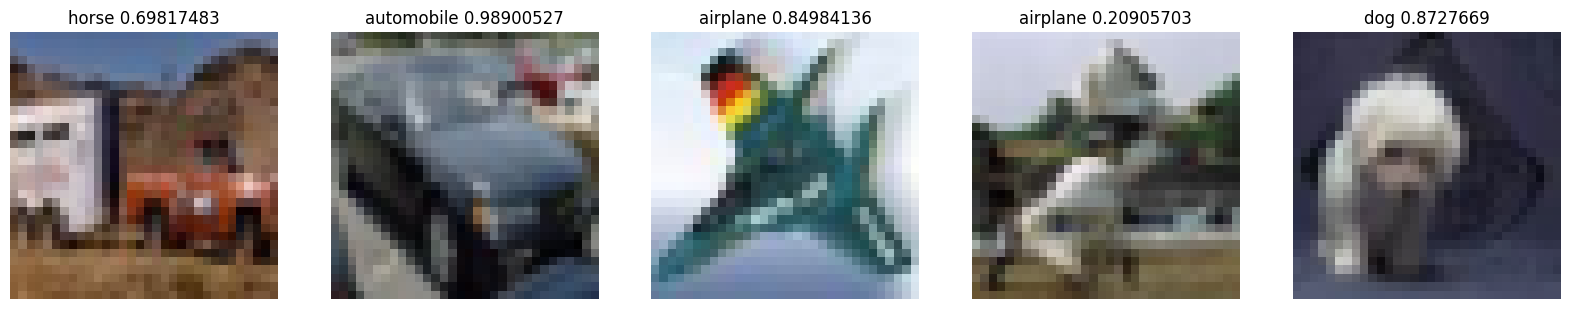

In [7]:
images = x_test[random.sample(range(0, len(x_test)), 5)]
# predict the class of each image
predictions = model_cnn.predict(images)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
# show the images
fig = plt.figure(figsize=(20, 20))
for i in range(len(images)):
    fig.add_subplot(1, 5, (i+1)*1)
    plt.imshow(images[i])
    plt.axis('off')
    best = max(predictions[i])
    class_name = classes[list(predictions[i]).index(best)]
    plt.title(class_name+ " "+ str(best))